In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [5]:
pd.options.display.max_rows = 999
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
5,1755,Yes
6,1775,Yes
7,1887,Yes
8,1893,Yes
9,1580,No


Lets convert admitted data into numerical as 'Yes':1 and 'No':0

In [6]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
5,1755,1
6,1775,1
7,1887,1
8,1893,1
9,1580,0


In [7]:
# Declaring the dependent and independent variables
y = data['Admitted']
x1 = data['SAT']

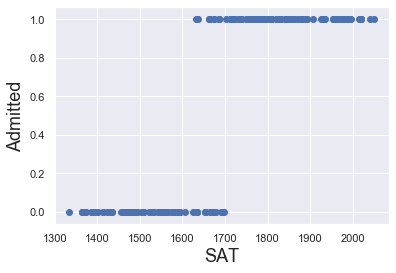

In [8]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=18)
plt.ylabel('Admitted', fontsize=18)
plt.show()

Lets try drawing a linear regression line.

E:\softwares\softwares_installation\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


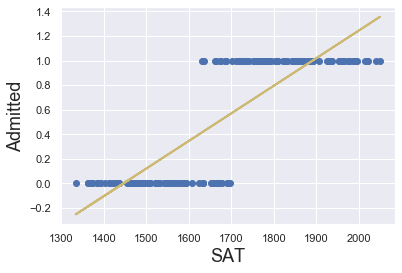

In [17]:
x = sm.add_constant(x1)
reg_line = sm.OLS(y, x)
results_line = reg_line.fit()

plt.scatter(x1, y)
y_hat = x1*results_line.params[1] + results_line.params[0]

plt.plot(x1, y_hat, lw=2, color='C8')
plt.xlabel('SAT', fontsize=18)
plt.ylabel('Admitted', fontsize=18)
plt.show()

In [24]:
results_line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Sun, 17 May 2020   Prob (F-statistic):           2.98e-43
Time:                        20:53:22   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This regression doesn't even know that our values are bounded between 0 and 1,

This shows that Linear regressionis not fit for this kind of data, Since first assumption of Linearity is voilated.

Our data is non-linear we must use non-linear models.

Lets try with logistic regression:

In [22]:
reg_log = sm.Logit(y,x) #logit regression model parameters are depenent and independent variables
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


The above is statsmodel took 10 iterations and the current function value, There's always the possibility the model won't learn the relationship for statsmodel it is 35.

In [23]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 May 2020   Pseudo R-squ.:                  0.7992
Time:                        20:52:40   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

***
From the above summary **Method:** MLE

*Maximum likelihood estimation(MLE)*: Likelihood function: A function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables.
- **The bigger the likelihood function, the higher the probability that our model is correct!**

MLE tries to maximize he likelihood function.
The computer is going through different values, untill it finds a model, for which the likelihood is the highest.

When it can no longer improve it, it will just stop the optimization.
***
**Log-Likelihood:** The value of the log likelihood is almost but not always negative, The bigger the log likelihood function, the higher the probability that out model is correct!
***
**LL-Null(Log Likelihood Null):** The log-likelihood of a model which has no independent variables.
***
F-statistic in Linear regression is same as LLR(log likelihood ratio)
**LLR(log ikelihood ratio)**: it measures if our model is statistically different from LL-null, a.k.a a useless model.
From the above in our model the p-value is very low 0.000 so our model is significant.
***
**Pseudo R-squ**(Pseudo R-Squared): There are several R-squared values like AIC, BIC, McFadden's R-squared.
In the above table the Pseud R-squ is McFadden's R-squared, 

A good Pseudo R-squared is somewhere between 0.2 and 0.4, This measure is mostly useful for comparing variations of the same model. Different models will have completely different and incomparable Pseudo R-squares!
***
**Logit model**
The logit model for SAT - Admittance regression is:

$log(\frac{\pi}{1-\pi})$ = -69.9128 + 0.042 * SAT

- \pi -> refers to the probability of an event occuring, 
- 1 - \pi -> referes to the probability of event **not** occuring
- $\frac{\pi}{1-\pi}$ -> odds

Lets consider two odds:

$log(odds{\substack{1}}) =-69.9128 + 0.042 * SAT{\substack{1}}$

$log(odds{\substack{2}}) =-69.9128 + 0.042 * SAT{\substack{2}}$

Now lets subtract both:

$log(odds{\substack{2}}/odds{\substack{1}}) = 0.042(SAT{\substack{2}} - SAT{\substack{1}})$

- now assume the difference 1 unit of SAT:

$log(odds{\substack{2}}/odds{\substack{1}}) = 0.042$

exponenting both sides implies:

$e^{log(odds{\substack{2}}/odds{\substack{1}})} = e^{0.042}$

$\frac{odds\substack{1}}{odds\substack{2}} = 1.042$

Therefore $odds\substack{2} = 104.2% * odds\substack{1}$    or

_$odds\substack{2}$ are 4.2% higher than $odds\substack{1}$_

- if the differenc of 10 units:

_$odds\substack{2}$ are 52% higher than $odds\substack{1}$_

- if the differenc of 100 units:

_$odds\substack{2}$ are 66% higher than $odds\substack{1}$_

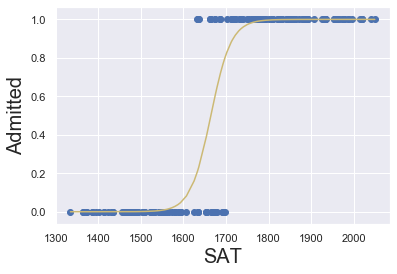

In [25]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()